## Bengaluru House Price Predictive Model


In [1]:
# Import all the neccessary  libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings("ignore")

## Read the data from the csv file

In [2]:
data = pd.read_csv("Bengaluru_House_Data.csv",encoding="latin-1")
data.head()

# Replace 'latin-1' with the actual encoding of your file if it's different from UTF-8. 
# Specifying the correct encoding should help to read the file without encountering the UnicodeDecodeError.


,area_type,availability,location,size,society,total_sqft,bath,balcony,price,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,$39.07,NaN,NaN,NaN,NaN
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,$120.00,NaN,NaN,NaN,NaN
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,$62.00,NaN,NaN,NaN,NaN
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,$95.00,NaN,NaN,NaN,NaN
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,$51.00,NaN,NaN,NaN,NaN


### Check the dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  object 
 9   Unnamed: 9    0 non-null      float64
 10  Unnamed: 10   0 non-null      float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   0 non-null      float64
dtypes: float64(6), object(7)
memory usage: 1.3+ MB


## Making the Dataset into correct format 

In [4]:
# In this Dataset Price is target variable, let's clean it
# all the special char in price variable
print(data.price.str.extract("([^\w\s])").value_counts())

# keep only numbers
data['Price'] = data.price.str.extract("(\d+)").astype(float)
data.Price.value_counts()

.    2522
?     202
     110
$      23
-       2
dtype: int64


65.0      333
75.0      331
55.0      321
45.0      301
60.0      300
         ... 
815.0       1
2250.0      1
369.0       1
343.0       1
488.0       1
Name: Price, Length: 485, dtype: int64

In [5]:
# availability feature overview
data.availability.unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [6]:
# Extract month from availability column
data['availability'] = data['availability'].str.extract(r'(\w{3,})')

In [7]:
# see the uniqueness in the data
print(data['size'].unique())

# extracting the size of the BHK and Bedroom
data['size'] = data['size'].str.split().str.get(0).astype(float)

['2 BHK' '4 Bedroom' '3 BHK' '4 BHK' '6 Bedroom' '3 Bedroom' '1 BHK'
 '1 RK' '1 Bedroom' '8 Bedroom' '2 Bedroom' '7 Bedroom' '5 BHK' '7 BHK'
 '6 BHK' '5 Bedroom' '11 BHK' '9 BHK' nan '9 Bedroom' '27 BHK'
 '10 Bedroom' '11 Bedroom' '10 BHK' '19 BHK' '16 BHK' '43 Bedroom'
 '14 BHK' '8 BHK' '12 Bedroom' '13 BHK' '18 Bedroom']


In [8]:
# total sqft column have the '-' between the numeric values
print(data.total_sqft.unique())

# convert range number into mean and float
def sqft(s):
    temp = s.split(' - ')
    if len(temp)==2:
        return ((float(temp[0])+float(temp[1]))/2)
    try:
        return float(s)
    except:
        return None


data['total_sqft'] = data['total_sqft'].astype('str').apply(sqft)
print(data.total_sqft.unique())

['1056' '2600' '1440' ... '1133 - 1384' '774' '4689']
[1056.  2600.  1440.  ... 1258.5  774.  4689. ]


In [9]:
# removiing any extra space from location values
data['location'] = data['location'].astype('str').apply(lambda x: x.strip())

In [10]:
# analysing the location column
data.location.value_counts()

# total 1295 unique values,how many of them are smaller in count

Whitefield                            541
Sarjapur  Road                        399
Electronic City                       304
Kanakpura Road                        273
Thanisandra                           237
                                     ... 
1Channasandra                           1
Hosahalli                               1
Vijayabank bank layout                  1
near Ramanashree California resort      1
Abshot Layout                           1
Name: location, Length: 1295, dtype: int64

In [11]:
# if any value <= 9
loc= data.location.value_counts()

# there are total 1041 locations smaller in count
value_count_9 = loc[loc<9]

data['location'] = data['location'].apply(lambda x: 'other' if x in value_count_9 else x)
data['location'].value_counts()

other                2567
Whitefield            541
Sarjapur  Road        399
Electronic City       304
Kanakpura Road        273
                     ... 
Gollahalli              9
Kamakshipalya           9
Chandra Layout          9
Peenya                  9
Jakkur Plantation       9
Name: location, Length: 276, dtype: int64

In [12]:
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Price
0,Super built-up Area,Dec,Electronic City Phase II,2.0,Coomee,1056.0,2.0,1.0,$39.07,NaN,NaN,NaN,NaN,39.0
1,Plot Area,Ready,Chikka Tirupathi,4.0,Theanmp,2600.0,5.0,3.0,$120.00,NaN,NaN,NaN,NaN,120.0
2,Built-up Area,Ready,Uttarahalli,3.0,NaN,1440.0,2.0,3.0,$62.00,NaN,NaN,NaN,NaN,62.0
3,Super built-up Area,Ready,Lingadheeranahalli,3.0,Soiewre,1521.0,3.0,1.0,$95.00,NaN,NaN,NaN,NaN,95.0
4,Super built-up Area,Ready,Kothanur,2.0,NaN,1200.0,2.0,1.0,$51.00,NaN,NaN,NaN,NaN,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready,Whitefield,5.0,ArsiaEx,3453.0,4.0,0.0,231,NaN,NaN,NaN,NaN,231.0
13316,Super built-up Area,Ready,other,4.0,NaN,3600.0,5.0,NaN,400,NaN,NaN,NaN,NaN,400.0
13317,Built-up Area,Ready,Raja Rajeshwari Nagar,2.0,Mahla T,1141.0,2.0,1.0,60,NaN,NaN,NaN,NaN,60.0
13318,Super built-up Area,Jun,Padmanabhanagar,4.0,SollyCl,4689.0,4.0,1.0,488,NaN,NaN,NaN,NaN,488.0


### Drop Duplicates

<AxesSubplot:>

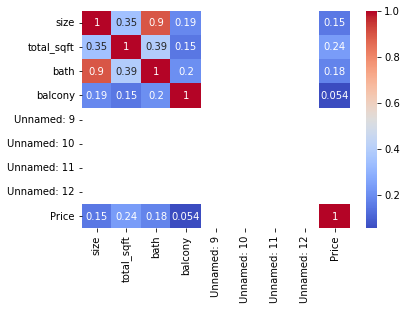

In [13]:
# check the correlation between the variables
sns.heatmap(data.corr(),annot=True, cmap='coolwarm')

In [14]:
# drop the null values 
print("before shape",data.shape)
data.drop(['price','Unnamed: 12','Unnamed: 11', "Unnamed: 10","Unnamed: 9",'society','balcony','area_type','availability'],axis=1, inplace=True)
print("after shape",data.shape)

before shape (13320, 14)
after shape (13320, 5)


<AxesSubplot:>

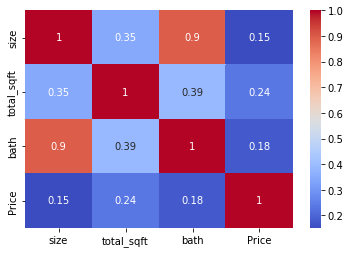

In [15]:

sns.heatmap(data.corr(),annot=True, cmap='coolwarm')

In [16]:
# data shape before the data
print("before the cleaning the duplicates",data.shape)
print("\n",data[data.duplicated()].count())
print("--"*39)

# removing duplicate values
data = data.drop_duplicates(keep="last")
print("data shape after duplicates removal", data.shape)


before the cleaning the duplicates (13320, 5)

 location      1317
size          1317
total_sqft    1315
bath          1316
Price         1317
dtype: int64
------------------------------------------------------------------------------
data shape after duplicates removal (12003, 5)


## filling the missing values

In [17]:
data.isna().sum()

location       0
size          16
total_sqft    44
bath          72
Price          0
dtype: int64

##### Location

In [18]:
# check the number values repeated most of the time
# print(data.location.value_counts())

# location variable missing one value, which can be filled with mode
# data['location'] = data.location.fillna(data.location.mode()[0])

# check if any nnull value
# data.location.isna().sum()

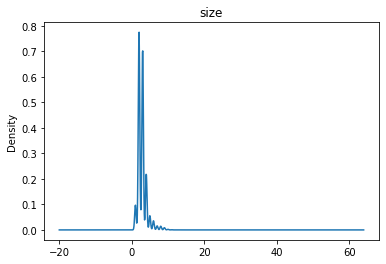

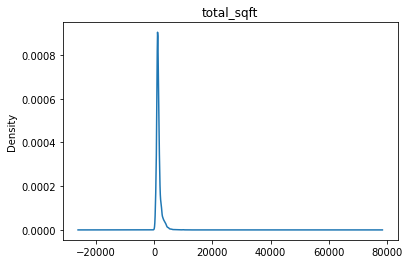

In [19]:
# data.balcony.plot.density()
# plt.title("Balconies")
# plt.show()

# df_random.Bedrooms.astype(float)
data['size'].plot.density()
plt.title("size")
plt.show()

data['total_sqft'].plot.density()
plt.title("total_sqft")
plt.show()

In [20]:
data.fillna({'size':data['size'].median(),
             'bath':data['bath'].median(),
             'total_sqft': data['total_sqft'].median()
          #    'balcony':data.balcony.median()
},inplace=True)

data.isna().sum()

location      0
size          0
total_sqft    0
bath          0
Price         0
dtype: int64

In [21]:
# check the desccription of numerical data
data.describe([0.001,0.01, 0.1, 0.25, 0.5,0.75,0.95,0.99,0.999])

,size,total_sqft,bath,Price
count,12003.000000,12003.000000,12003.000000,12003.000000
mean,2.844206,1587.495910,2.731567,120.499542
std,1.336322,1288.044614,1.381644,414.908006
min,1.000000,1.000000,1.000000,8.000000
0.1%,1.000000,302.026000,1.000000,11.000000
1%,1.000000,500.000000,1.000000,19.000000
10%,2.000000,890.200000,2.000000,38.000000
25%,2.000000,1100.000000,2.000000,50.000000
50%,3.000000,1300.000000,2.000000,75.000000
75%,3.000000,1705.000000,3.000000,125.000000


In [22]:
# sns.pairplot(data=data)

In [23]:
data.reset_index(drop=True, inplace=True)

#  Seperate the X and Y variables
X= data.drop(['Price'],axis=1)
Y= data['Price']

#### Outliers Treatment

In [24]:
# def outlier_cap(x):
#     x=x.clip(lower=x.quantile(0.01))
#     x=x.clip(upper=x.quantile(0.99))
#     return(x)


num = X.select_dtypes('number')
# # capping and flooring of 0.1% ensures the minimal SD impact on the dataset
# data=X.select_dtypes('number').apply(lambda x : outlier_cap(x))  

# # dataset after outlier Treatment
# data.describe([0.001,0.01, 0.1, 0.25, 0.5,0.75,0.95,0.99,0.999])

In [25]:
# split the data in train and test

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=123)

In [26]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Response Rate in Training Data",y_train.mean())
print("Response Rate in Testing Data",y_test.mean())

Shape of Training Data (9002, 4)
Shape of Testing Data (3001, 4)
Response Rate in Training Data 121.9219062430571
Response Rate in Testing Data 116.23292235921359


# Model Building

In [42]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [46]:
column_transf = make_column_transformer((OneHotEncoder(sparse=False),['location']),remainder='passthrough')

scalar = StandardScaler()

lr = LinearRegression(normalize=True)


In [47]:
# create a pipeline
pipe_lr = make_pipeline(column_transf,scalar,lr)

In [49]:
X_test


,location,size,total_sqft,bath
3745,Padmanabhanagar,3.0,1400.0,3.0
5144,Sarjapur Road,5.0,3930.0,7.0
10,7th Phase JP Nagar,2.0,1000.0,2.0
1674,Chamrajpet,4.0,1080.0,4.0
6400,other,4.0,2400.0,4.0
...,...,...,...,...
4629,other,4.0,2675.0,4.0
7961,Kengeri Satellite Town,3.0,1450.0,2.0
2703,Uttarahalli,3.0,1250.0,2.0
5783,Whitefield,3.0,1550.0,2.0


In [48]:
# fit the data
pipe_lr.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression(normalize=True))])

In [65]:
# make prediction

ypred_lr = pipe_lr.predict(X_test)
# check r2 score

print(r2_score(y_test,ypred_lr))

pipe_lr.score(X_test,y_test)



0.33399671672903264


0.33399671672903264

### Lass0

In [67]:
# check with lasso
lasso = Lasso()
pipe_lasso = make_pipeline(column_transf,scalar,lasso)
pipe_lasso.fit(X_train,y_train)


ypred_lasso = pipe_lasso.predict(X_test)
r2_score(y_test,ypred_lasso)

0.333942849845673